## Boston Survival Guide
##### *Team members: Alvaro Chinchayan, Leighton Li, Andrey Lifar, Yoki Liu, Sherry Zuo

#### Our team is interested in crimes that were reported in the Boston area (including 11 districts) from June 2015 to October 2018. 
#### The main purpose of our project is to analyze patterns of crimes, the potential incentives for crimes, as well as how other factors such as housing prices, income correlate with crimes.
#### Crime Data Source: https://www.kaggle.com/ankkur13/boston-crime-data 
#### Housing Data Source: https://www.zillow.com/boston-ma/home-values/
#### Income Data Source: https://statisticalatlas.com/county-subdivision/Massachusetts/Suffolk-County/Boston/Household-Income

### Table of Content
-1 Preview of data

-2 Data Analysis

- 2.1 Time Analysis

-- 2.1.1 Time series

-- 2.1.2 Year/month/week/day/hour with the most crimes

-- 2.1.3 Regression for time & time_Crime

- 2.2 Location Analysis

-- 2.2.1 Region/district/Street with the most crimes

-- 2.2.2 Distribution of crimes by Districts -- Bubble chart

-- 2.2.3 Location,Housing Prices and Crimes -- Distribution & Regression

-- 2.2.4 Location_Income & Location_Crime -- Distribution & Regression

- 2.3 Crime Attribute Analysis

-- 2.3.1 Crime Types 

-- 2.3.2 Example.shooting

- 2.4 Multivariate Analysis

-- 2.4.1 Location & Crime Type

-- 2.4.2 Crime Type & Time

-- 2.4.3 Time & Location

-3 Summary



### 1.Preview of data

First, let's indentify all the variables in our datasets.

- Crime dataset

In [1]:
%%bq query
SELECT *
FROM `team-6-is-perfect.Boston_Crime.boston_crime` 
LIMIT 3

INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
I182079891,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C6,,,2018-10-03 12:53:00,2018,10,Wednesday,12,Part One,DORCHESTER ST,,,"(0.00000000, 0.00000000)"
I182079891,3125,Warrant Arrests,WARRANT ARREST,C6,,,2018-10-03 12:53:00,2018,10,Wednesday,12,Part Three,DORCHESTER ST,,,"(0.00000000, 0.00000000)"
I182079820,1402,Vandalism,VANDALISM,C11,,,2018-10-03 05:00:00,2018,10,Wednesday,5,Part Two,BOWDOIN ST,,,"(0.00000000, 0.00000000)"


- Housing dataset

In [2]:
%%bq query
SELECT *
FROM `team-6-is-perfect.Boston_Crime.boston_housing`
LIMIT 3

Region_Name,District,Region_Type,Type,Current
Brighton,D14,neighborhood,All Homes,452600
Charlestown,A15,neighborhood,All Homes,728600
Downtown,A1,neighborhood,All Homes,1152300


- Income dataset

In [3]:
%%bq query
SELECT *
FROM `team-6-is-perfect.Boston_Crime.boston_income_populationGrowth`
LIMIT 3

Neighborhood,District,Income,Population_Growth,Period
Allston,,39717,0.17,2000-2010
Brighton,D14,50110,0.042,2000-2010
Back Bay,,88469,0.054,2000-2015


In order to match all three datasets by district, we refer to the following website: https://bpdnews.com/districts

### 2.Data Analysis

### 2.1 Time Analysis

#### 2.1.1 Time series

Below is an overview of the number of crimes in time order

In [4]:
%%bq query -n crimes_year_month
SELECT TIMESTAMP(CONCAT(CAST(EXTRACT(year from OCCURRED_ON_DATE) AS STRING), "-", CAST(EXTRACT(month from OCCURRED_ON_DATE) AS STRING), "-01")) year_month, count(incident_number) as num_incident 
FROM Boston_Crime.boston_crime
GROUP BY year_month;

In [5]:
%%chart annotation --d crimes_year_month

#### 2.1.2 Year/month/week/day/hour with the most crimes

#### Question: Which year has the highest amount of crimes?

In [6]:
%%bq query
SELECT year, count(year) as numcrime_year
FROM Boston_Crime.boston_crime
Group by year
Order by numcrime_year DESC;

year,numcrime_year
2017,100938
2016,99134
2018,74356
2015,53392


#### Answer: 2017 has the highest amount of crime

#### Question: Which month has the highest amount of crimes?

In [7]:
%%bq query
SELECT month, count(month) as numcrime_month
FROM Boston_Crime.boston_crime
Group by month
Order by numcrime_month DESC
LIMIT 4;

month,numcrime_month
8,35137
7,34640
9,34023
6,30622


#### Answer: On average, August has the highest amount of crimes.

#### Question: Which day of the week is the most dangerous?

In [8]:
%%bq query
SELECT day_of_week, count(day_of_week) as numcrime_weekday
FROM Boston_Crime.boston_crime
Group by day_of_week
Order by numcrime_weekday DESC;

day_of_week,numcrime_weekday
Friday,49758
Wednesday,48151
Thursday,47872
Tuesday,47726
Monday,46970
Saturday,45969
Sunday,41374


#### Answer: On average, Friday has the highest amount of crimes.

In [9]:
%%bq query -n crime_of_week
SELECT day_of_week, count (day_of_week) as day_of_week_crime_amount,Case when day_of_week = 'Monday' then 1
  when day_of_week = 'Tuesday' then 2
  when day_of_week = 'Wednesday' then 3
  when day_of_week = 'Thursday' then 4
  when day_of_week = 'Friday' then 5
  when day_of_week = 'Saturday' then 6
  when day_of_week = 'Sunday' then 7 end as weekday
FROM Boston_Crime.boston_crime
Group by day_of_week
Order by weekday;

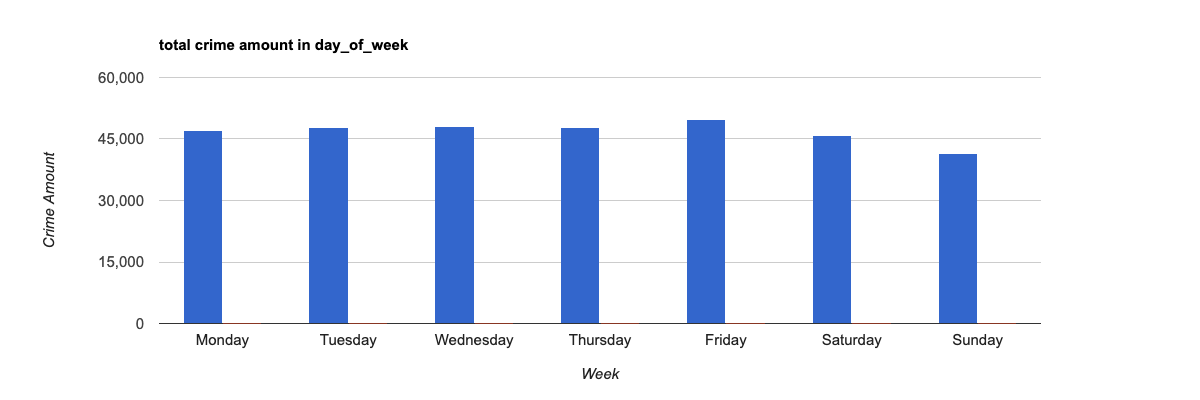

In [10]:
%%chart columns -d crime_of_week
title: total crime amount in day_of_week
height: 400
width: 1200
hAxis:
  title: Week
vAxis:
  title: Crime Amount
legend: none

##### We also try to answer the same questions with car accidents excluded considering the fact that they are usually unintentional.

In [11]:
%%bq query
SELECT day_of_week, count(OFFENSE_CODE_GROUP) as numcrime_new
FROM Boston_Crime.boston_crime
Where OFFENSE_CODE_GROUP != 'Motor Vehicle Accident Response'
Group by day_of_week
Order by numcrime_new DESC
LIMIT 7

day_of_week,numcrime_new
Friday,43751
Wednesday,42750
Thursday,42547
Tuesday,42340
Monday,41704
Saturday,40360
Sunday,36234


##### After removing all Motor Vehicle Accident Responses, we get the same results. 

#### Question: What time is the most dangerous of a day?

In [12]:
%%bq query
SELECT hour, count(hour) as numcrime_hour
FROM Boston_Crime.boston_crime
Group by hour
Order by numcrime_hour DESC
LIMIT 5;

hour,numcrime_hour
17,21350
18,20908
16,20373
12,19198
19,18055


#### Answer: On average, crimes mostly occur at 5pm

In [13]:
%%bq query -n crime_of_hour
SELECT hour, count(hour) as numcrime_hour
FROM Boston_Crime.boston_crime
Group by hour
Order by numcrime_hour DESC

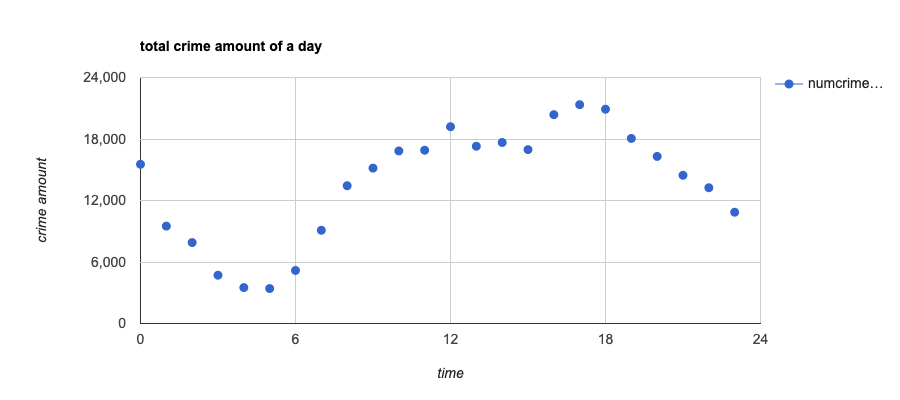

In [14]:
%%chart scatter -d crime_of_hour
title: total crime amount of a day
height: 400
width: 900
hAxis:
  title: time
vAxis:
  title: crime amount

#### Question: Do crimes usually happen during the day or the night?

In [11]:
%%bq query
SELECT Case when (hour >= 6 and hour <= 18) then 'daytime' else 'night' end as crime_happen_time, count(hour) as crime_hours
FROM Boston_Crime.boston_crime
Group by crime_happen_time
Order by crime_happen_time

crime_happen_time,crime_hours
daytime,210350
night,117470


#### Answer: It's more likely for crimes to happen in the daytime

In [14]:
%%bq query -n crime_time 
SELECT Case when (hour >= 6 and hour <= 18) then 'daytime' else 'night' end as crime_happen_time, count(hour) as crime_hours
FROM Boston_Crime.boston_crime
Group by crime_happen_time

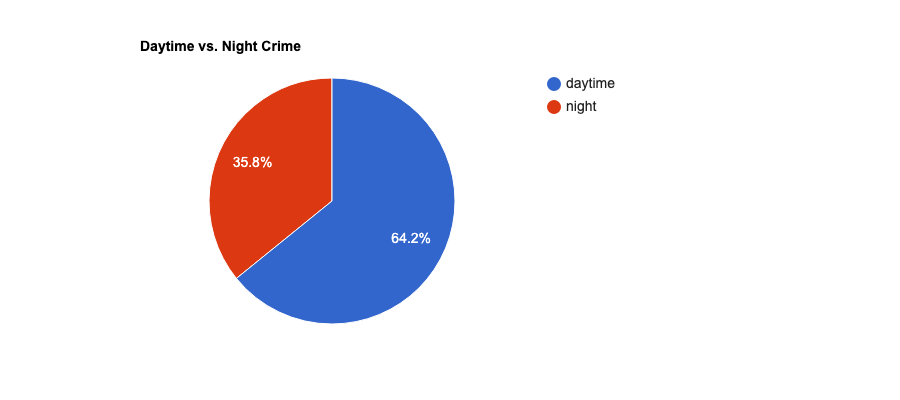

In [15]:
%%chart pie --d crime_time
title: Daytime vs. Night Crime
height: 400
width: 900

#### 2.1.3 Regression for time & time_Crime

#### For the regression, we create three dummy variables and assign values (0 or 1) by categorizing each of them. 

-	Month_type:

-- “colder” as 1: from November to April 

-- “warmer” as 0: from May to October 

-	Week_type:

-- Weekends as 1

-- Weekdays as 0

-	Hour_type:

-- Daytime as 1: from 6am to 6pm

-- Nighttime as 0: from 7pm to 5am

In [18]:
%%bq query
select
count (incident_number) as numcrime_in_time,
case when month in (11,12,1,2,3,4) then 1
else 0 end as month_type,
case when DAY_OF_WEEK in ('Saturday','Sunday') then 1
else 0 end as week_type,
case when HOUR >=6 and hour <=18 then 1
else 0 end as hour_type
FROM `team-6-is-perfect.Boston_Crime.boston_crime`
group by month_type,week_type,hour_type

numcrime_in_time,month_type,week_type,hour_type
91121,0,0,1
46379,0,0,0
28095,0,1,1
21506,0,1,0
16283,1,1,0
69675,1,0,1
33302,1,0,0
21459,1,1,1


In [19]:
%%bq query
create or replace model`team-6-is-perfect.Boston_Crime.regression`
options(
model_type='linear_reg',
input_label_cols=['numcrime_in_time'])
as (select
count (incident_number) as numcrime_in_time,
case when month in (11,12,1,2,3,4) then 1
else 0 end as month_type,
case when DAY_OF_WEEK in ('Saturday','Sunday') then 1
else 0 end as week_type,
case when HOUR >=6 and hour <=18 then 1
else 0 end as hour_type
FROM `team-6-is-perfect.Boston_Crime.boston_crime`
group by month_type,week_type,hour_type)

QueryResultsTable job_VBTXOubci8kE3zffFPk8AbxgFKVt

In [20]:
%%bq query
with regression_table as
(select
count (incident_number) as numcrime_in_time,
case when month in (11,12,1,2,3,4) then 1
else 0 end as month_type,
case when DAY_OF_WEEK in ('Saturday','Sunday') then 1
else 0 end as week_type,
case when HOUR >=6 and hour <=18 then 1
else 0 end as hour_type
FROM `team-6-is-perfect.Boston_Crime.boston_crime`
group by month_type,week_type,hour_type)

select *
from
ML.evaluate( model`team-6-is-perfect.Boston_Crime.regression`, table regression_table)

mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
8668.75,85456909.6631,0.260012525106,7719.46112,0.862218911891,0.862258832374


In [21]:
%%bq query
with eval_table as
(select
count (incident_number) as numcrime_in_time,
case when month in (11,12,1,2,3,4) then 1
else 0 end as month_type,
case when DAY_OF_WEEK in ('Saturday','Sunday') then 1
else 0 end as week_type,
case when HOUR >=6 and hour <=18 then 1
else 0 end as hour_type
FROM `team-6-is-perfect.Boston_Crime.boston_crime`
group by month_type,week_type,hour_type)

select *
from
ML.WEIGHTS( model`team-6-is-perfect.Boston_Crime.regression`, STRUCT(true AS standardize))

processed_input,weight
month_type,-6174.25492822
week_type,-20384.8120861
hour_type,12363.951484
__INTERCEPT__,40820.1464


#### Regression Function: predicted number of crime = 40820.146 - 6174.255 * month_type(dummy) - 20384.812 * week_type(dummy)+12363.951*hour_type(dummy)
#### R-square: 0.862 which is a reliable regression

### 2.2 Location Analysis

 #### 2.2.1 Region/District/Street with the most crimes

#### Question: Which neighboorhood is the most dangerous?

In [22]:
%%bq query
SELECT district, count(district) as numcrime_in_district
FROM Boston_Crime.boston_crime
Group by district
Order by numcrime_in_district DESC
LIMIT 5;

district,numcrime_in_district
B2,51288
C11,43817
D4,43338
A1,36735
B3,36400


#### Answer: The most dangerous district is B2 which is Roxbury.

#### Question: What are the most dangerous streets?

In [23]:
%%bq query
SELECT street, count(street) as numcrime_street
FROM Boston_Crime.boston_crime
Group by street
Order by numcrime_street DESC
LIMIT 5;

street,numcrime_street
WASHINGTON ST,14590
BLUE HILL AVE,8002
BOYLSTON ST,7425
DORCHESTER AVE,5297
TREMONT ST,4925


#### Answer: The most dangerous street in Boston is Washington St.

#### 2.2.2 Distribution of crimes by Districts--bubble chart

#### We use a bubble chart to represent the distribution of crimes in different districts in Boston

In [24]:
%%bq query
SELECT distinct(district), count(district) as numcrime
FROM Boston_Crime.boston_crime
WHERE district IS NOT NULL
GROUP BY district

district,numcrime
C6,24190
C11,43817
D4,43338
A1,36735
D14,20632
B2,51288
E13,17981
E18,17825
B3,36400
A15,6663


In [25]:
%%bq query
SELECT distinct district, AVG(lat) AS lat, -AVG(long) AS lon
FROM Boston_Crime.boston_crime
WHERE (district IS NOT NULL) AND (long!=-1) AND (lat!=-1) AND Long is not NULL AND lat is not NULL
GROUP BY district

district,lat,lon
E5,42.2824396887,71.1413665707
B3,42.2869372686,71.0851357929
E18,42.2626449604,71.1189275003
C11,42.3004188959,71.0631435474
B2,42.3216240128,71.0847784499
E13,42.3150172319,71.106445615
C6,42.333595631,71.0522138897
D4,42.3434649652,71.080862658
D14,42.3502852632,71.1422996426
A1,42.3568119784,71.0610989757


In [6]:
%%bq query
WITH temp1 AS(
SELECT distinct(district), count(district) as numcrime
FROM Boston_Crime.boston_crime
WHERE district IS NOT NULL
GROUP BY district),
temp2 AS(
SELECT distinct district, AVG(lat) AS lat, -AVG(long) AS lon
FROM Boston_Crime.boston_crime
WHERE (district IS NOT NULL) AND (long!=-1) AND (lat!=-1) AND Long is not NULL AND lat is not NULL
GROUP BY district)

SELECT district, lat, lon, numcrime
FROM temp1
LEFT JOIN temp2
USING(district)


district,lat,lon,numcrime
C6,42.333595631,71.0522138897,24190
C11,42.3004188959,71.0631435474,43817
D4,42.3434649652,71.080862658,43338
A1,42.3568119784,71.0610989757,36735
D14,42.3502852632,71.1422996426,20632
B2,42.3216240128,71.0847784499,51288
E13,42.3150172319,71.106445615,17981
E18,42.2626449604,71.1189275003,17825
B3,42.2869372686,71.0851357929,36400
A15,42.3760562756,71.0626650145,6663


In [7]:
%%bq query -n crime_map
WITH temp1 AS(
SELECT distinct(district), count(district) as numcrime
FROM Boston_Crime.boston_crime
WHERE district IS NOT NULL
GROUP BY district),
temp2 AS(
SELECT distinct district, AVG(lat) AS lat, -AVG(long) AS lon
FROM Boston_Crime.boston_crime
WHERE (district IS NOT NULL) AND (long!=-1) AND (lat!=-1) AND Long is not NULL AND lat is not NULL
GROUP BY district)

SELECT district, lat, lon, numcrime
FROM temp1
LEFT JOIN temp2
USING(district)

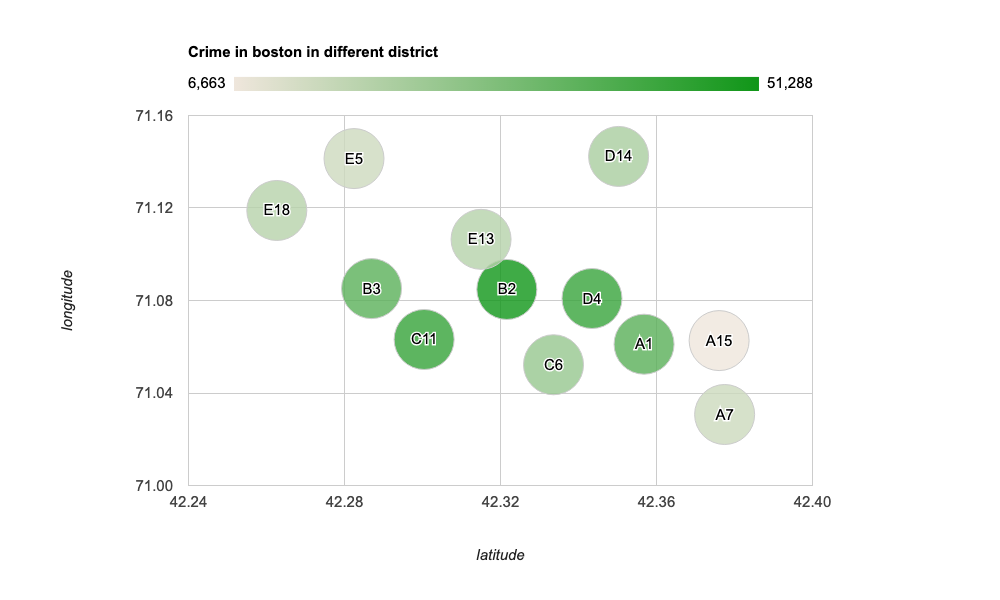

In [8]:
%%chart bubbles --data crime_map
title: Crime in boston in different district
height: 600
width: 1000
hAxis:
  title: latitude
vAxis:
  title: longitude

#### 2.2.3 Location,Housing Prices and Crimes

We are interested in finding a relationship between crimes and housing prices

#### Question: Do housing prices have effects on the number of crimes?

##### Distribution for Location_Housing price & Location_Crime

In [28]:
%%bq query
SELECT 
housing.District,
housing.current as price_in_district,
crime.numcrime_in_district
FROM (SELECT district, count(district) as numcrime_in_district
FROM `team-6-is-perfect.Boston_Crime.boston_crime`
Group by district
) as crime
inner join `team-6-is-perfect.Boston_Crime.boston_housing` as housing 
on crime.district=housing.District

District,price_in_district,numcrime_in_district
C6,691200,24190
C11,505800,43817
D4,867000,43338
A1,1152300,36735
D14,452600,20632
B2,408900,51288
E13,615600,17981
E18,435700,17825
B3,395100,36400
A15,728600,6663


In [29]:
%%bq query -n housecrime
SELECT 
housing.current as x,
crime.numcrime_in_district as y
FROM (SELECT district, count(district) as numcrime_in_district
FROM `team-6-is-perfect.Boston_Crime.boston_crime`
Group by district
) as crime
inner join `team-6-is-perfect.Boston_Crime.boston_housing` as housing 
on crime.district=housing.District

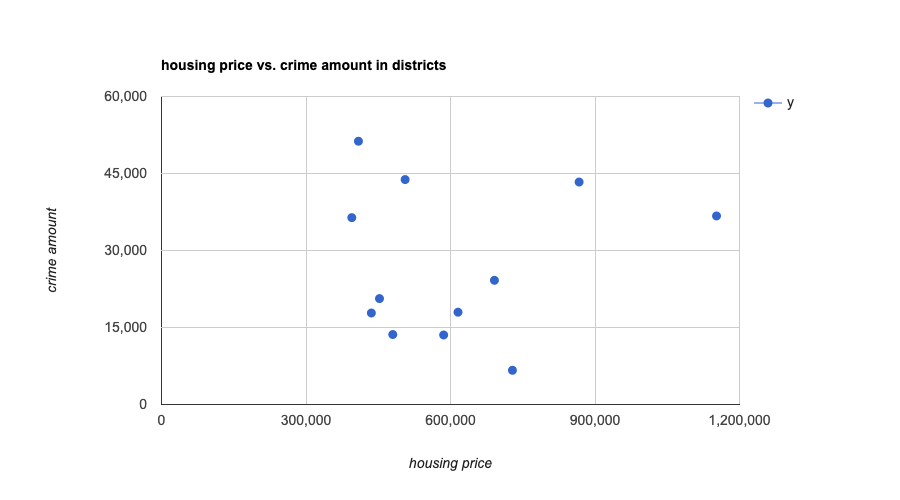

In [30]:
%%chart scatter --data housecrime
title: housing price vs. crime amount in districts
height: 500
width: 900
hAxis:
  title: housing price
vAxis:
  title: crime amount

In [31]:
%%bq query
create or replace model`team-6-is-perfect.Boston_Crime.regression2`
options(
model_type='linear_reg',
input_label_cols=['numcrime_in_district'])
as (SELECT 
housing.current as price_in_district,
crime.numcrime_in_district 
FROM (SELECT district, count(district) as numcrime_in_district
FROM `team-6-is-perfect.Boston_Crime.boston_crime`
Group by district
) as crime
inner join `team-6-is-perfect.Boston_Crime.boston_housing` as housing 
on crime.district=housing.District)

QueryResultsTable job_wEmMEw_ZVQguhstKwC6VnUd-Xkpi

##### Regression for Location_Housing price & Location_Crime

In [32]:
%%bq query
with regression2_table as
(SELECT 
housing.current as price_in_district,
crime.numcrime_in_district 
FROM (SELECT district, count(district) as numcrime_in_district
FROM `team-6-is-perfect.Boston_Crime.boston_crime`
Group by district
) as crime
inner join `team-6-is-perfect.Boston_Crime.boston_housing` as housing 
on crime.district=housing.District)

select *
from
ML.evaluate( model`team-6-is-perfect.Boston_Crime.regression2`, table regression2_table)

mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
12368.1692798,191308713.448,0.364550419593,10418.7050145,0.00607445528099,0.00613101103686


In [33]:
%%bq query
with eval2_table as
(SELECT 
housing.current as price_in_district,
crime.numcrime_in_district 
FROM (SELECT district, count(district) as numcrime_in_district
FROM `team-6-is-perfect.Boston_Crime.boston_crime`
Group by district
) as crime
inner join `team-6-is-perfect.Boston_Crime.boston_housing` as housing 
on crime.district=housing.District)

select *
from
ML.WEIGHTS( model`team-6-is-perfect.Boston_Crime.regression2`, STRUCT(true AS standardize))

processed_input,weight
price_in_district,1130.272288
__INTERCEPT__,27066.16528


#### Answer:
#### Regression function: predicted number of crime = 27066.165 + 1130.272 * price_in_district
#### R-square is 0.006 which is not a reliable regression

#### 2.2.4 Location_Income & Location_Crime

#### Question: Do incomes have effects on the amount of crimes?

##### Distribution for Location_Income & Location_Crime

In [34]:
%%bq query
SELECT 
income.District,
income.Income as income_in_district,
crime.crime_num as numcrime_in_district
FROM (SELECT district, count(district) as crime_num
FROM `team-6-is-perfect.Boston_Crime.boston_crime`
WHERE district IS NOT NULL 
GROUP BY district
) as crime
LEFT JOIN `team-6-is-perfect.Boston_Crime.boston_income_populationGrowth`
AS income
ON crime.district = income.District
ORDER BY crime_num DESC 

District,income_in_district,numcrime_in_district
B2,25937,51288
C11,47200,43817
D4,77161,43338
A1,65090,36735
B3,43256,36400
C6,77223,24190
D14,50110,20632
E13,76968,17981
E18,65260,17825
A7,51549,13634


In [35]:
%%bq query -n incomecrime
SELECT 
income.Income as a,
crime.crime_num as b
FROM (SELECT district, count(district) as crime_num
FROM `team-6-is-perfect.Boston_Crime.boston_crime`
WHERE district IS NOT NULL 
GROUP BY district
) as crime
LEFT JOIN `team-6-is-perfect.Boston_Crime.boston_income_populationGrowth`
AS income
ON crime.district = income.District
ORDER BY crime_num DESC 

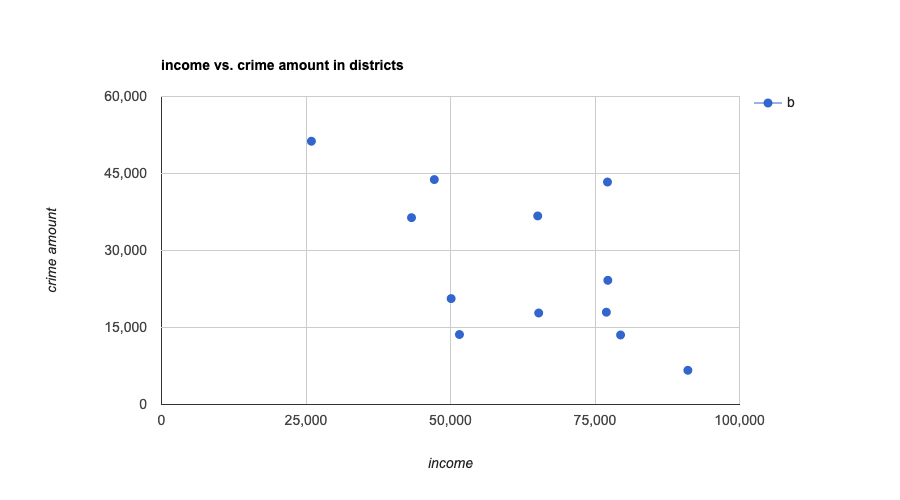

In [36]:
 %%chart scatter --data incomecrime
title: income vs. crime amount in districts
height: 500
width: 900
hAxis:
  title: income
vAxis:
  title: crime amount

##### Regression for Location_Income & Location_Crime

In [37]:
%%bq query
create or replace model`team-6-is-perfect.Boston_Crime.regression3`
options(
model_type='linear_reg',
input_label_cols=['numcrime_in_district'])
as (SELECT 
income.Income as income_in_district,
crime.crime_num as numcrime_in_district
FROM (SELECT district, count(district) as crime_num
FROM `team-6-is-perfect.Boston_Crime.boston_crime`
WHERE district IS NOT NULL 
GROUP BY district
) as crime
LEFT JOIN `team-6-is-perfect.Boston_Crime.boston_income_populationGrowth`
AS income
ON crime.district = income.District)

QueryResultsTable job_4QZQirq-BOxrQ_xmblfxbuRRnasb

In [38]:
%%bq query
with regression3_table as
(SELECT 
income.Income as income_in_district,
crime.crime_num as numcrime_in_district
FROM (SELECT district, count(district) as crime_num
FROM `team-6-is-perfect.Boston_Crime.boston_crime`
WHERE district IS NOT NULL 
GROUP BY district
) as crime
LEFT JOIN `team-6-is-perfect.Boston_Crime.boston_income_populationGrowth`
AS income
ON crime.district = income.District)

select *
from
ML.evaluate( model`team-6-is-perfect.Boston_Crime.regression3`, table regression3_table)

mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
9101.88930552,121302745.739,0.214969160512,7322.51126441,0.369783553185,0.369840108941


In [39]:
%%bq query
with eval3_table as
(SELECT 
income.Income as income_in_district,
crime.crime_num as numcrime_in_district
FROM (SELECT district, count(district) as crime_num
FROM `team-6-is-perfect.Boston_Crime.boston_crime`
WHERE district IS NOT NULL 
GROUP BY district
) as crime
LEFT JOIN `team-6-is-perfect.Boston_Crime.boston_income_populationGrowth`
AS income
ON crime.district = income.District)

select *
from
ML.WEIGHTS( model`team-6-is-perfect.Boston_Crime.regression3`, STRUCT(true AS standardize))

processed_input,weight
income_in_district,-8778.57522285
__INTERCEPT__,27066.16528


#### Answer:
#### Regression function: predicted number of crime = 27066.165 - 8788.575 * income_in_district
#### R-square is 0.37 which is a partial reliable regression

### 2.3 Crime Attribute Analysis

#### 2.3.1 Crime Types

#### Question: What is the most common crime in Boston? 

In [40]:
%%bq query
SELECT offense_code_group, count(offense_code_group) as OffenseFrequency
FROM Boston_Crime.boston_crime 
Group by offense_code_group
Order by OffenseFrequency DESC 
LIMIT 5; 

offense_code_group,OffenseFrequency
Motor Vehicle Accident Response,38134
Larceny,26670
Medical Assistance,24226
Investigate Person,19176
Other,18612


#### Answer: Motor Vehicle Accident Response is the most common crime in Boston and the second is Larceny

### Particularly, we analyze incidences of shootings

#### 2.3.2 Example.shooting

#### Question: How many shootings were reported during the four years?

In [41]:
%%bq query 
SELECT COUNT(shooting) AS TotalShootingOffense
FROM Boston_Crime.boston_crime 

TotalShootingOffense
1055


#### Answer: There are 1055 incidences of shooting reported over the four years.

In [42]:
%%bq query -n shooting_in_month
SELECT TIMESTAMP(CONCAT(CAST(EXTRACT(year from OCCURRED_ON_DATE) AS STRING), "-", CAST(EXTRACT(month from OCCURRED_ON_DATE) AS STRING), "-01")) year_month, count(shooting) as shooting_in_month_base 
FROM Boston_Crime.boston_crime
WHERE SHOOTING IS NOT NULL 
GROUP BY year_month
ORDER BY year_month;

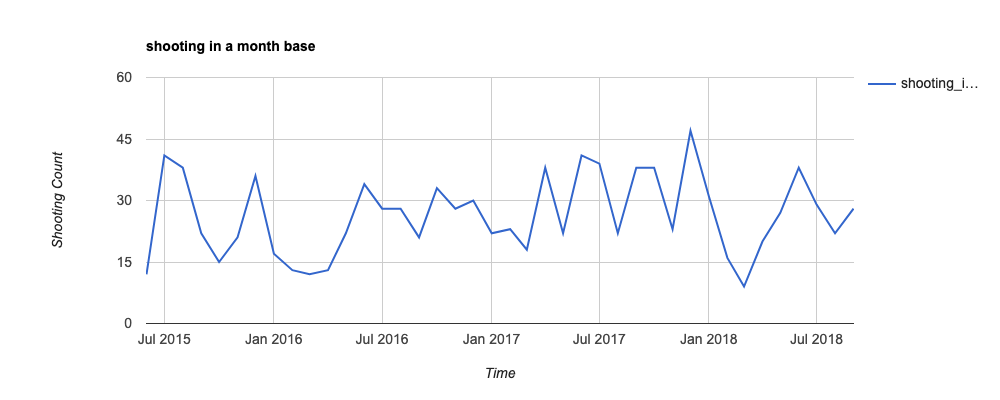

In [43]:
%%chart line --d shooting_in_month
title: shooting in a month base
height: 400
width: 1000
hAxis:
  title: Time
vAxis:
  title: Shooting Count

#### Based on the data, there are more than 15 shootings in each month on average.

### 2.4 Multivariate Analysis

#### 2.4.1 Location & Crime Type

In [44]:
%%bq query
SELECT Street,OFFENSE_CODE_GROUP, count(INCIDENT_NUMBER) as numcrime
FROM Boston_Crime.boston_crime
where Street is not Null
Group by street,OFFENSE_CODE_GROUP
Order by numcrime DESC
LIMIT 10

Street,OFFENSE_CODE_GROUP,numcrime
BOYLSTON ST,Larceny,2216
WASHINGTON ST,Larceny,1973
BLUE HILL AVE,Motor Vehicle Accident Response,1289
WASHINGTON ST,Drug Violation,1248
WASHINGTON ST,Motor Vehicle Accident Response,1160
WASHINGTON ST,Medical Assistance,1027
WASHINGTON ST,Other,1023
NEWBURY ST,Larceny,883
HUNTINGTON AVE,Larceny,844
DORCHESTER AVE,Motor Vehicle Accident Response,843


#### Incidences of larceny happened frequently on Boylston Street

#### 2.4.2 Crime Type & Time

In [45]:
%%bq query
SELECT hour,OFFENSE_CODE_GROUP, count(INCIDENT_NUMBER) as numcrime
FROM Boston_Crime.boston_crime
Group by hour,OFFENSE_CODE_GROUP
Order by numcrime DESC
LIMIT 10

hour,OFFENSE_CODE_GROUP,numcrime
17,Motor Vehicle Accident Response,2667
16,Motor Vehicle Accident Response,2530
18,Motor Vehicle Accident Response,2370
17,Drug Violation,2202
18,Drug Violation,2145
15,Motor Vehicle Accident Response,2137
12,Larceny,2050
14,Motor Vehicle Accident Response,2006
16,Larceny,2001
17,Larceny,1997


#### Motor vehicle accident responses occur frequently in the late afternoon

#### 2.4.3 Time & Location

In [46]:
%%bq query
SELECT hour,DISTRICT, count(INCIDENT_NUMBER) as numcrime
FROM Boston_Crime.boston_crime
Group by hour,DISTRICT
Order by numcrime DESC
LIMIT 10

hour,DISTRICT,numcrime
17,B2,3353
18,B2,3325
16,B2,3120
12,B2,2984
19,B2,2975
17,D4,2878
18,D4,2848
12,D4,2840
18,C11,2776
17,C11,2775


#### District B2(Roxbury) is on the top of the crime list when grouped by hour and district.

### 3. Summary
Based on our analysis above, in general, there is a higher chance for car accidents to happen in Boston so driving safely may be the first priority in terms of avoiding crimes. In addition, people need to pay more attention to personal properties when staying outside on Fridays. The most dangerous street and neighborhood go to Washington Street and Roxbury so please be mindful if you will be there especially at 5pm. Hope our project will help you survive in Boston!!!